In [478]:
# Please enter your names

names = "Fabian Langer, Yannik Bretschneider"

# Programming Exercise: Single Pass
In this exercise you will need to implement the Single Pass algorithm.

In [479]:
import numpy as np
import matplotlib.pyplot as plt

# Tell matplotlib to plot inside the Notebook
%matplotlib inline

Then we need a notion for data points and clusters to make our life a little easier. Complete the missing parts:

In [ ]:
class Point:
    x = 0
    y = 0
    
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
    
    def distanceTo(self, point):
        # Compute Euclidean distance
        distance = np.sqrt((self.x - point.x)**2 + (self.y - point.y)**2)
        return distance
    
    def __mul__(self, other):
        # Scale vector by a given facter
        assert isinstance(other, (float)), "Unsupported operand type(s) for *: 'float' and '{}'".format(type(other).__name__)
        return Point(self.x * other, self.y * other)

    def __add__(self, other):
        # Add two points
        assert isinstance(other, Point), "Unsupported operand type(s) for +: 'Point' and '{}'".format(type(other).__name__)
        return Point(self.x + other.x, self.y + other.y)


class Cluster:
    centroid = Point() # Centroid point of the cluster
    num = 0 # Number of points in the cluster
    cid = 0 # Cluster ID

    def __init__(self, centroid: Point = Point(), cid = 0):
        self.centroid = centroid
        self.cid = cid
        self.num = 1
    
    def addPoint(self, point):
        # If there is no centroid yet, use the point as centroid
        if not self.centroid:
            self.num = 1
            self.centroid = Point(point.x, point.y)
        # If there is a centroid, update it
        else:
            self.num += 1
            self.centroid = self.centroid * ((self.num - 1) / float(self.num)) + point * (1 / float(self.num))

And we need a function to plot datapoints with their assigned cluster color.

In [481]:
import random
colormap = []

def get_random_hex_color():
  """Generates a random hex color code."""
  def r():
      return random.randint(0, 255)
  return '#%02X%02X%02X' % (r(),r(),r())

def initplot():
    # Initialize th plot
    global colormap
    plt.suptitle('SinglePass')
    # Initial colors, more will be generated if needed
    colormap = ['black','red','blue','green','orange','purple','yellow','pink']
    
def plot(point,c):
    # Generate random colors if needed
    global colormap
    while c > len(colormap) - 1:
        colormap.append(get_random_hex_color())
    # Plot the data point in the color of the cluster
    plt.scatter(point.x, point.y, c=colormap[c], s=40)

Write a function that performs the Single Pass Clustering. Since its a streaming based clustering, it will only see one data point at a time. Don't forget to plot each datapoint after assigning it to a cluster.

In [ ]:
clusters = []
cid = 1

def SinglePass(point, threshold):
    #Write Single Pass Algorithm here
    global clusters
    global cid
    
    point_cid = None # Cluster closest to the point
    cid_dist = float('inf') # closest distance so far

    for cluster in clusters:
        # Check if cluster is close enough
        if (dist := point.distanceTo(cluster.centroid)) < threshold:
            # Add point to the cluster (which also move it's centroid)
            cluster.addPoint(point)
            # If the cluster is the closest so far, remeber the cluster id
            if dist < cid_dist:
                cid_dist = dist
                point_cid = cluster.cid

    # Create a new cluster, if the point wasn't close enough to one of the exsisting ones
    if point_cid is None:
        clusters.append(Cluster(point, cid))
        point_cid = cid
        cid += 1

    return (point, point_cid) # return point and its closest cluster id
    

*Note*: Please download datasets.zip, extract the files.

Now we set up everything for loading the data.

In [483]:
filepath  = "./clustering-datasets/" 
filenames = ["Aggregation","Compound","D31","flame","jain","pathbased","R15","spiral"]
fileextension = ".txt"

Set the parameters:

In [484]:
thresholds = {"Aggregation": 10,
              "Compound": 13,
              "D31": 4,
              "flame": 8.1,
              "jain": 13,
              "pathbased": 10,
              "R15": 6,
              "spiral": 7}

Finally, we can cluster the data using Single Pass Clustering:

In [ ]:

def main(filename):
    threshold = thresholds[filename]
    initplot()
    f = filepath+filename+fileextension
    file = open(f,"r")
    line = file.readline()
    while(line != ""):
        a = line[:-1].split()
        x = float(a[0])
        y = float(a[1])
        nPoint, nCid = SinglePass(Point(x,y),threshold)
        plot(nPoint, nCid)
        line = file.readline()
    file.close()
    print("Finished clustering dataset: " + filename)

Finished clustering dataset: Compound


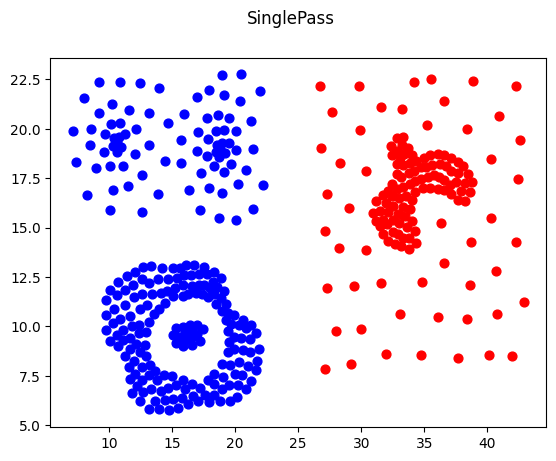

In [486]:
main(filenames[1])